In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

from google.colab import drive
drive.mount('/content/drive')

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 20 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (8,090 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletyp

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


Index(['자치구 기준일', '종로구 전체', '종로구 추가', '중구 전체', '중구 추가', '용산구 전체', '용산구 추가',
       '성동구 전체', '성동구 추가', '광진구 전체', '광진구 추가', '동대문구 전체', '동대문구 추가', '중랑구 전체',
       '중랑구 추가', '성북구 전체', '성북구 추가', '강북구 전체', '강북구 추가', '도봉구 전체', '도봉구 추가',
       '노원구 전체', '노원구 추가', '은평구 전체', '은평구 추가', '서대문구 전체', '서대문구 추가', '마포구 전체',
       '마포구 추가', '양천구 전체', '양천구 추가', '강서구 전체', '강서구 추가', '구로구 전체', '구로구 추가',
       '금천구 전체', '금천구 추가', '영등포구 전체', '영등포구 추가', '동작구 전체', '동작구 추가', '관악구 전체',
       '관악구 추가', '서초구 전체', '서추구 추가', '강남구 전체', '강남구 추가', '송파구 전체', '송파구 추가',
       '강동구 전체', '강동구 추가', '기타 전체', '기타 추가'],
      dtype='object')

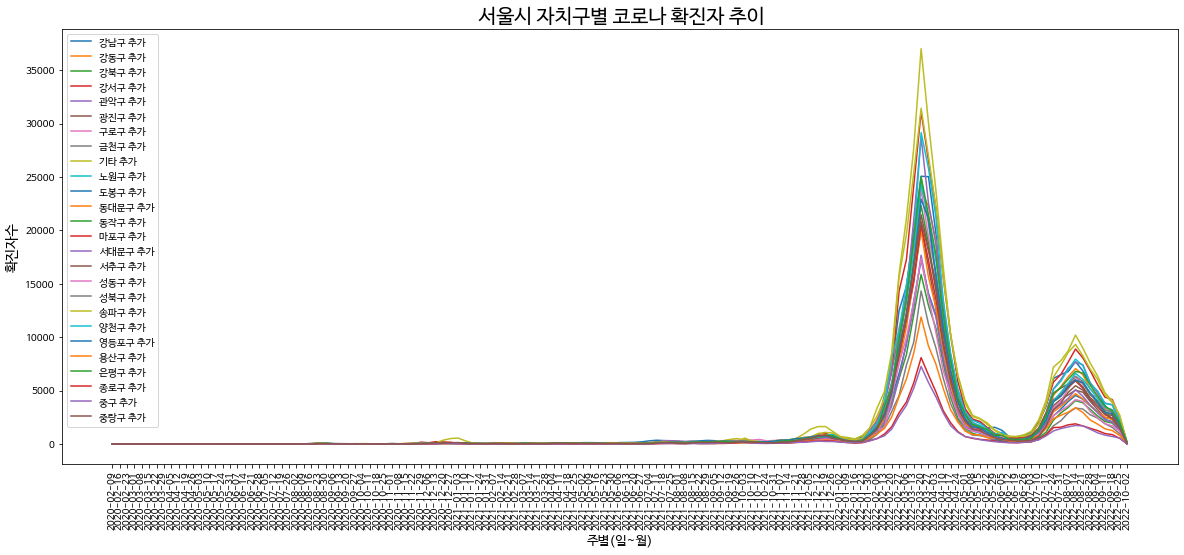

In [ ]:
import csv
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import numpy as np       

df_raw = pd.read_csv('/서울시 코로나19 자치구별 확진자 발생동향.csv', encoding = 'cp949')

df = df_raw[df_raw.columns[::2]]

df['자치구 기준일'] = pd.to_datetime(df['자치구 기준일'])
df_pivot = df.pivot_table(index = '자치구 기준일', values = ['자치구 기준일', '종로구 추가', '중구 추가', '용산구 추가', '성동구 추가', '광진구 추가', '동대문구 추가',
       '중랑구 추가', '성북구 추가', '강북구 추가', '도봉구 추가', '노원구 추가', '은평구 추가', '서대문구 추가',
       '마포구 추가', '양천구 추가', '강서구 추가', '구로구 추가', '금천구 추가', '영등포구 추가', '동작구 추가',
       '관악구 추가', '서추구 추가', '강남구 추가', '송파구 추가', '강동구 추가', '기타 추가'])

df_weekly = df_pivot.resample('W').sum()

plt.rc('font', family='NanumBarunGothic')                                                             #한글 안깨지게..
plt.rcParams['axes.unicode_minus'] = False

df_name = df_weekly.columns

plt.figure(figsize = (20, 8))   
for df in df_name:
    plt.plot(df_weekly[df], label = df)
    plt.legend()                                                                                  #범례 표시
    plt.title(' 서울시 자치구별 코로나 확진자 추이', fontsize = 20)                                #그래프 제목
    plt.xlabel('주별(일~월)', fontsize = 13)                                                       #x축 제목
    plt.ylabel('확진자수', fontsize = 14)                                                         #y축 제목
    plt.xticks(df_weekly.index.to_list() , rotation=90)       
